--- STARTING EXPERIMENT 1.1: LINEAR REGRESSION ---
Linear Regression MSE: 0.5559
Linear Regression R2 Score: 0.5758

Performing Hyperparameter Tuning (Ridge Regression)...
Best Alpha for Ridge: {'alpha': 0.1}
Best R2 Score (Ridge): 0.6115
--------------------------------------------------

--- STARTING EXPERIMENT 1.2: LOGISTIC REGRESSION ---
Accuracy: 0.9736842105263158

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



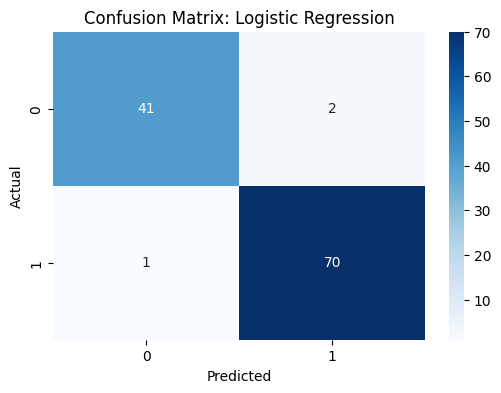


Performing Hyperparameter Tuning...
Best Hyperparameters: {'C': 0.1, 'solver': 'liblinear'}
Best CV Accuracy: 0.9780


In [1]:
# --- IMPORTS ---
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing, load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, classification_report, confusion_matrix

# ==========================================
# EXPERIMENT 1.1: LINEAR REGRESSION
# Dataset: California Housing
# ==========================================
print("--- STARTING EXPERIMENT 1.1: LINEAR REGRESSION ---")

# 1. Load Data
housing = fetch_california_housing()
X_reg = pd.DataFrame(housing.data, columns=housing.feature_names)
y_reg = housing.target

# 2. Preprocessing
# Split 80/20
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

# Scaling (Important for regression performance and tuning)
scaler_reg = StandardScaler()
X_train_reg_scaled = scaler_reg.fit_transform(X_train_reg)
X_test_reg_scaled = scaler_reg.transform(X_test_reg)

# 3. Model Training (Standard OLS)
lin_reg = LinearRegression()
lin_reg.fit(X_train_reg_scaled, y_train_reg)

# 4. Evaluation
y_pred_reg = lin_reg.predict(X_test_reg_scaled)
mse = mean_squared_error(y_test_reg, y_pred_reg)
r2 = r2_score(y_test_reg, y_pred_reg)

print(f"Linear Regression MSE: {mse:.4f}")
print(f"Linear Regression R2 Score: {r2:.4f}")

# 5. Hyperparameter Tuning (Using Ridge Regression as OLS has no hyperparameters to tune)
print("\nPerforming Hyperparameter Tuning (Ridge Regression)...")
ridge = Ridge()
param_grid_reg = {'alpha': [0.1, 1.0, 10.0, 100.0]}
grid_reg = GridSearchCV(ridge, param_grid_reg, cv=5, scoring='r2')
grid_reg.fit(X_train_reg_scaled, y_train_reg)

print(f"Best Alpha for Ridge: {grid_reg.best_params_}")
print(f"Best R2 Score (Ridge): {grid_reg.best_score_:.4f}")
print("-" * 50)


# ==========================================
# EXPERIMENT 1.2: LOGISTIC REGRESSION
# Dataset: Breast Cancer Wisconsin
# ==========================================
print("\n--- STARTING EXPERIMENT 1.2: LOGISTIC REGRESSION ---")

# 1. Load Data
cancer = load_breast_cancer()
X_cls = pd.DataFrame(cancer.data, columns=cancer.feature_names)
y_cls = cancer.target

# 2. Preprocessing
X_train_cls, X_test_cls, y_train_cls, y_test_cls = train_test_split(X_cls, y_cls, test_size=0.2, random_state=42)

# Scaling (Crucial for Logistic Regression convergence)
scaler_cls = StandardScaler()
X_train_cls_scaled = scaler_cls.fit_transform(X_train_cls)
X_test_cls_scaled = scaler_cls.transform(X_test_cls)

# 3. Model Training
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_cls_scaled, y_train_cls)

# 4. Evaluation
y_pred_cls = log_reg.predict(X_test_cls_scaled)
print("Accuracy:", accuracy_score(y_test_cls, y_pred_cls))
print("\nClassification Report:\n", classification_report(y_test_cls, y_pred_cls))

# Visualizing Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test_cls, y_pred_cls), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix: Logistic Regression')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# 5. Hyperparameter Tuning
print("\nPerforming Hyperparameter Tuning...")
param_grid_cls = {'C': [0.01, 0.1, 1, 10, 100], 'solver': ['liblinear', 'lbfgs']}
grid_cls = GridSearchCV(LogisticRegression(max_iter=2000), param_grid_cls, cv=5)
grid_cls.fit(X_train_cls_scaled, y_train_cls)

print(f"Best Hyperparameters: {grid_cls.best_params_}")
print(f"Best CV Accuracy: {grid_cls.best_score_:.4f}")